## TASK 1

`Descriptive Statistics`

`Basic Statistics`

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

nltk.download('vader_lexicon')

data = pd.read_csv('../datas/raw_analyst_ratings.csv')

data['headline_length'] = data['headline'].apply(len)

print(data['headline_length'].describe())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/teddy/nltk_data...


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


`Count the number of articles per publisher`

In [2]:
publisher_counts = data['publisher'].value_counts()
print(publisher_counts)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


`Bar chart for Top Publisher`

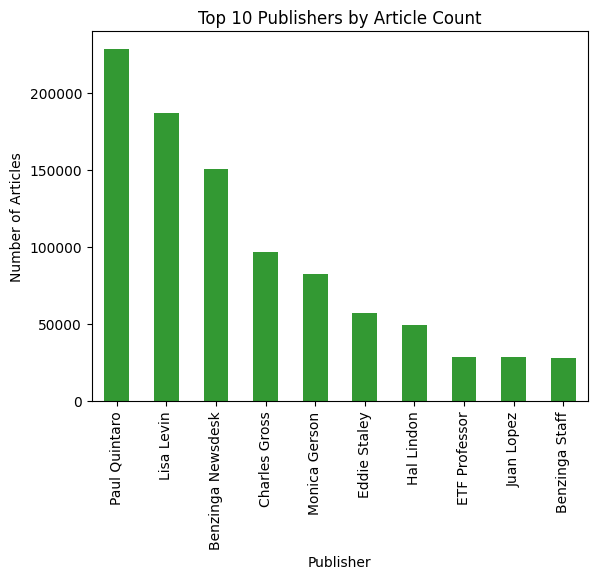

In [23]:
top_publishers = publisher_counts.head(10)
top_publishers.plot(kind='bar', color='green', alpha=0.8)
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()

`Distribution of Publisher Contributions`

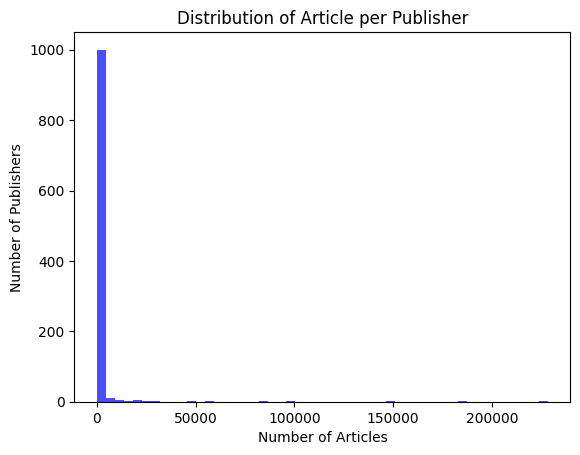

In [24]:
plt.hist(publisher_counts, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Article per Publisher')
plt.xlabel('Number of Articles')
plt.ylabel('Number of Publishers')
plt.show()

`See trends over time in publication`

In [3]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

data['day_of_week'] = data['date'].dt.day_name()

day_counts = data['day_of_week'].value_counts()

print(day_counts)


day_of_week
Thursday     12688
Wednesday    11891
Tuesday      11002
Monday       10322
Friday        9381
Sunday         436
Saturday       267
Name: count, dtype: int64


`Bar chart for Day Counts`

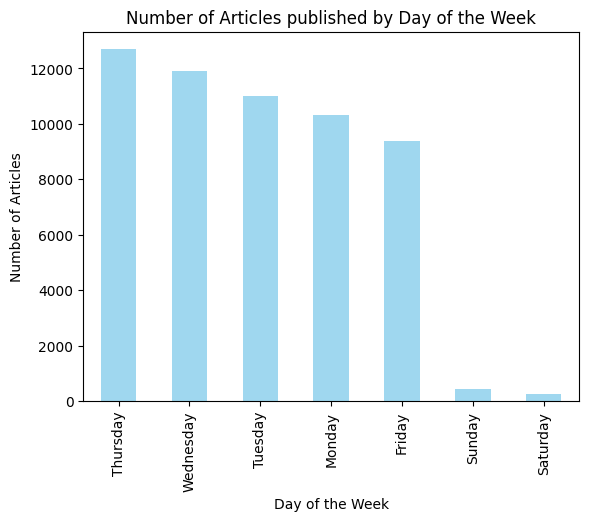

In [25]:
day_counts.plot(kind='bar', color='skyblue',alpha=0.8)
plt.title('Number of Articles published by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.show()

`Pie Chart for Proportions`

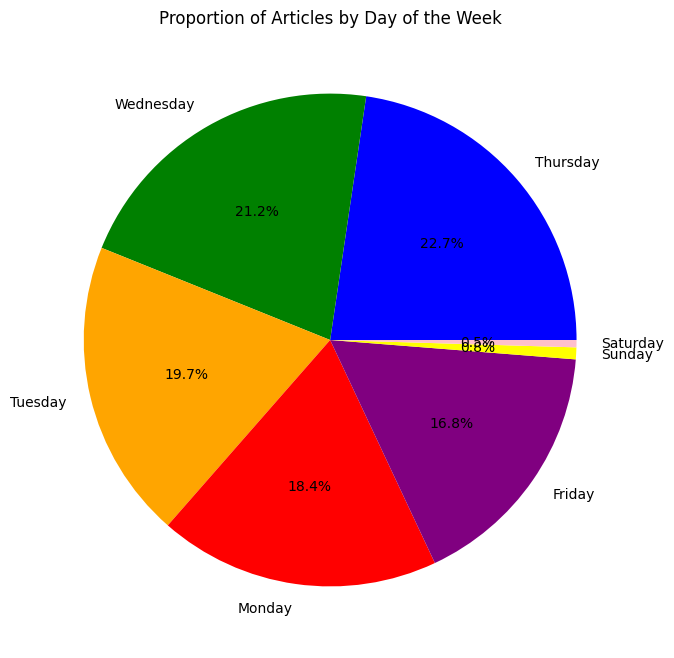

In [26]:
day_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), colors=['blue', 'green', 'orange', 'red', 'purple', 'yellow', 'pink'])
plt.title('Proportion of Articles by Day of the Week')
plt.ylabel('')
plt.show()

`Text Analysis (Sentiment Analysis & Topic Modeling)`

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment
def get_sentiment(text):
    return sid.polarity_scores(text)['compound']

# Process data in chunks
chunk_size = 1000  # Adjust the chunk size as needed
chunks = []

for start in tqdm(range(0, len(data), chunk_size)):
    chunk = data.iloc[start:start + chunk_size].copy()
    chunk['sentiment'] = chunk['headline'].apply(get_sentiment)
    chunks.append(chunk)

# Concatenate all chunks
data_sentiment = pd.concat(chunks)

# Basic statistics for sentiment
print(data_sentiment['sentiment'].describe())

100%|██████████| 1408/1408 [04:26<00:00,  5.29it/s]


count    1.407328e+06
mean     6.650410e-02
std      2.714077e-01
min     -9.578000e-01
25%      0.000000e+00
50%      0.000000e+00
75%      2.023000e-01
max      9.741000e-01
Name: sentiment, dtype: float64


`Histogram of Sentiment Scores`

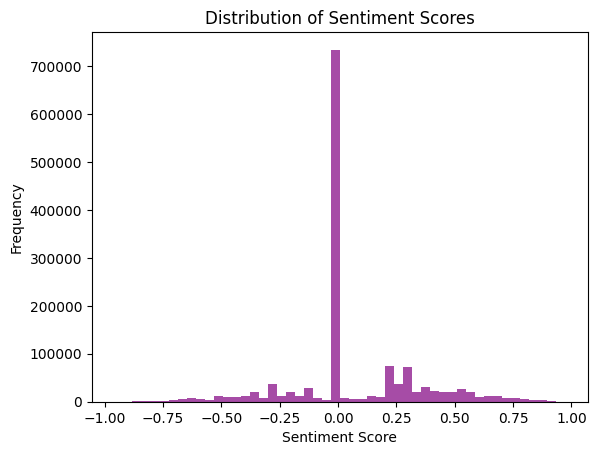

In [27]:
plt.hist(data_sentiment['sentiment'], bins=50, color='purple', alpha=0.7)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

`Identify Common Keywords or Phrases`

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['headline'])

# Sum the word counts without converting to dense
word_counts = pd.DataFrame(X.sum(axis=0), columns=vectorizer.get_feature_names_out()).T
word_counts.columns = ['count']
common_words = word_counts.sort_values(by='count', ascending=False).head(20)
print(common_words)

             count
vs          162099
stocks      161776
est         140604
eps         128897
market      120558
shares      114313
reports     108710
update       91723
earnings     87399
sales        79645
benzinga     74516
pt           73068
week         69572
announces    66591
price        64407
buy          64371
mid          62263
downgrades   61959
trading      61182
raises       57802


`Time Series Analysis`

`Publication frequency over time`

In [16]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
publication_frequency = data.set_index('date').resample('D').size()
print(publication_frequency)

date
2011-04-27 00:00:00-04:00      1
2011-04-28 00:00:00-04:00      2
2011-04-29 00:00:00-04:00      2
2011-04-30 00:00:00-04:00      1
2011-05-01 00:00:00-04:00      1
                            ... 
2020-06-07 00:00:00-04:00     25
2020-06-08 00:00:00-04:00    765
2020-06-09 00:00:00-04:00    804
2020-06-10 00:00:00-04:00    806
2020-06-11 00:00:00-04:00    544
Length: 3334, dtype: int64


`Analysis of publishing times`

In [18]:
data['hour'] = data['date'].dt.hour

hour_counts = data['hour'].value_counts().sort_index()
print(hour_counts)

hour
0.0       67
1.0       14
2.0       57
3.0       93
4.0     1469
5.0     1829
6.0     2476
7.0     5033
8.0     5527
9.0     5965
10.0    7669
11.0    5701
12.0    5732
13.0    2710
14.0    2075
15.0    1612
16.0    3939
17.0    2800
18.0     704
19.0     227
20.0     131
21.0      82
22.0      48
23.0      27
Name: count, dtype: int64


`Publisher Analysis`

`Count the number of articles per Publisher`

In [19]:
publisher_counts = data['publisher'].value_counts()
print(publisher_counts)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


`Identify Unique Domains from Email Addresses`

In [21]:
data['domain'] = data['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else x)

domain_counts = data['domain'].value_counts()
print(domain_counts)

domain
Paul Quintaro         228373
Lisa Levin            186979
Benzinga Newsdesk     150484
Charles Gross          96732
Monica Gerson          82380
                       ...  
Paul Dykewicz              1
Anthony Cibotti            1
DavidBDurandMD             1
Lydia Idem Finkley         1
David A. Moore             1
Name: count, Length: 1024, dtype: int64


`Analyze the Type of News Reported by Different Publishers`

In [22]:
publisher_sentiment = data.groupby('publisher')['sentiment'].mean().sort_values(ascending=False)
print(publisher_sentiment)

publisher
Happy Trading                     0.7650
Chris Fromhertz                   0.7579
janaviktoria                      0.7430
The Professor                     0.7269
dhiraj.surapaneni@benzinga.com    0.7096
                                   ...  
Gary Anderson                    -0.5719
parvgoel                         -0.5994
Melissa Brock                    -0.5994
Gino Bruno D'Alessio             -0.7832
Logan Mohtashami                 -0.7964
Name: sentiment, Length: 1034, dtype: float64
